In [1]:
import numpy as np 
import astropy.constants as c
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import gc
import math
#list all the constants used
G=c.G.value
M_sun=c.M_sun.value
M_earth=c.M_earth.value
R_sun=c.R_sun.value
R_earth=c.R_earth.value
hour=3600 #s
day=3600*24
e=0.1
t_LC=1765.5 #s

def delta(Rp, Rs):
    delta = (Rp*R_earth / (Rs*R_sun))**2*1e6
    return delta

def SNR(delta,n,sigma_s):
    SNR=delta*n**0.5/sigma_s
    return SNR

def sigma_s(t, sigma_LC, cdppindex): #t/hour
    t_LC=1765.5/hour 

    return sigma_LC*(t/t_LC)**cdppindex

def t_dur(P,Rs,e,a): #hour
    t_dur = P*day*Rs*R_sun*(1-e**2)/(np.pi*a)/hour
    return t_dur

def a(Ms,P):
    a=((G*Ms*M_sun*(P*day)**2)/(4*np.pi**2))**(1/3)
    return a 

def n(t_obs,P): # the unite of t_obs and P is day
    n=t_obs/P
    return n

def f_n(t_obs,P):
    if t_obs <=2*P:
        return 0
    if t_obs> 2*P and t_obs< 3*P:
        return (t_obs/P-2)
    if t_obs>=3*P:
        return 1
    
def f_eff(SNR):
    if SNR <=6:
        return 0
    if SNR >6 and SNR<=12:
        return (SNR-6)/6
    if SNR>12:
        return 1
    
def f_geo(Rp,Rs,a,e):
    f_geo = (Rp*R_earth+Rs*R_sun)/(a*(1-e**2))
    return f_geo


In [2]:
stellar_hot=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_G_hot.csv',sep=',')
stellar_cool=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_G_cool.csv',sep=',')
koi_hot=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction_G_2sigma_hot.csv',sep=',')
koi_cool=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction_G_2sigma_cool.csv',sep=',')


Ks_2sampResult(statistic=0.19815182851091362, pvalue=3.0200720059657667e-134)
-0.24738515081206386 -0.13654118319792413


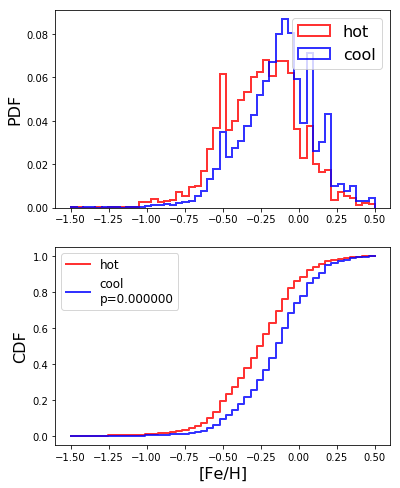

In [4]:
stellar_hot=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_G_hot.csv',sep=',')
stellar_cool=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_G_cool.csv',sep=',')


from scipy import stats
import statsmodels.api as sm
s1=stats.ks_2samp(stellar_hot['feh'],stellar_cool['feh'])
plt.figure(figsize=(6,8))
ax1=plt.subplot(2,1,1)
bins=np.linspace(-1.5,0.5,50)
weights1 = np.ones_like(stellar_hot['feh'])/float(len(stellar_hot['feh']))

ax1.hist(stellar_hot['feh'],bins,histtype="step",weights=weights1,color='red',linewidth=2,alpha=0.8,label='hot')

weights2 = np.ones_like(stellar_cool['feh'])/float(len(stellar_cool['feh']))
ax1.hist(stellar_cool['feh'],bins,histtype="step",weights=weights2,color='blue',linewidth=2,alpha=0.8,label='cool')
#ax1.grid(True)
#plt.setp(ax15.get_xticklabels(), visible=False)
ax1.legend(loc='best',fontsize=16)
ax1.set_ylabel("PDF",fontsize=16)
#ax1.set_xscale('log')
#ax1.set_xlim(1,1000)

ax2=plt.subplot(2,1,2)
ecdf=sm.distributions.ECDF(stellar_hot['feh'])
counts1=ecdf(bins)
ax2.step(bins,counts1,color='red',linewidth=2,alpha=0.8,label='hot')#
ecdf=sm.distributions.ECDF(stellar_cool['feh'])
counts2=ecdf(bins)
ax2.step(bins,counts2,color='blue',linewidth=2,alpha=0.8,label='cool'+'\n'+'p='+'{:5f}'.format(s1[1]))
ax2.set_xlabel("[Fe/H]",fontsize=16)
ax2.set_ylabel("CDF",fontsize=16)
#ax2.set_xlim(1,1000)
ax2.legend(loc='best',fontsize=12)
#ax2.set_xscale('log')
plt.savefig("result/G_kic_cool_hot_feh.eps")
print(s1)
print(np.mean(stellar_hot['feh']),np.mean(stellar_cool['feh']))


Ks_2sampResult(statistic=0.13341277904791293, pvalue=4.346630670994103e-61)
0.8904830626450089 0.9246204760429715


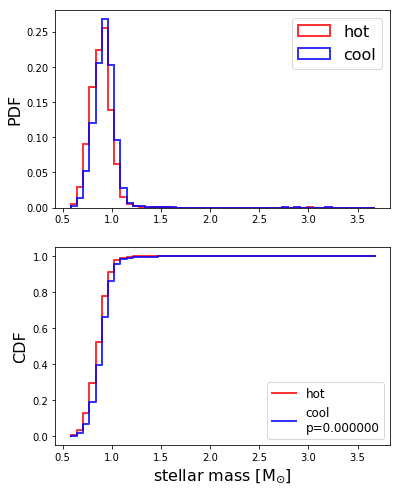

In [7]:
stellar_hot=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_G_hot.csv',sep=',')
stellar_cool=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_G_cool.csv',sep=',')


from scipy import stats
import statsmodels.api as sm
s1=stats.ks_2samp(stellar_hot['mass'],stellar_cool['mass'])
plt.figure(figsize=(6,8))
ax1=plt.subplot(2,1,1)
bins=np.linspace(min(min(stellar_hot['mass']),min(stellar_cool['mass'])),max(max(stellar_hot['mass']),max(stellar_cool['mass'])))
weights1 = np.ones_like(stellar_hot['mass'])/float(len(stellar_hot['mass']))

ax1.hist(stellar_hot['mass'],bins,histtype="step",weights=weights1,color='red',linewidth=2,alpha=0.8,label='hot')

weights2 = np.ones_like(stellar_cool['mass'])/float(len(stellar_cool['mass']))
ax1.hist(stellar_cool['mass'],bins,histtype="step",weights=weights2,color='blue',linewidth=2,alpha=0.8,label='cool')
#ax1.grid(True)
#plt.setp(ax15.get_xticklabels(), visible=False)
ax1.legend(loc='best',fontsize=16)
ax1.set_ylabel("PDF",fontsize=16)
#ax1.set_xscale('log')
#ax1.set_xlim(1,1000)

ax2=plt.subplot(2,1,2)
ecdf=sm.distributions.ECDF(stellar_hot['mass'])
counts1=ecdf(bins)
ax2.step(bins,counts1,color='red',linewidth=2,alpha=0.8,label='hot')#
ecdf=sm.distributions.ECDF(stellar_cool['mass'])
counts2=ecdf(bins)
ax2.step(bins,counts2,color='blue',linewidth=2,alpha=0.8,label='cool'+'\n'+'p='+'{:5f}'.format(s1[1]))
ax2.set_xlabel("stellar mass [M$_{\odot}$]",fontsize=16)
ax2.set_ylabel("CDF",fontsize=16)
#ax2.set_xlim(1,1000)
ax2.legend(loc='best',fontsize=12)
#ax2.set_xscale('log')
plt.savefig("result/G_kic_cool_hot_mass.eps")
print(s1)
print(np.mean(stellar_hot['mass']),np.mean(stellar_cool['mass']))